## Basic approach for PSO application on optimizing partial likelihood function for survival analysis

This file is designated to explore the performance of metaheuristic algorithms on likelihood estimation of survival analysis model.

In real life, there are problems that we cannot give an analytical solution. Also, there are problems which we cannot use gradient-based optimization algorithms, since it is hard or impossible to calculate the derivative/gradient of the target function. This is the place where metaheuristic algorithms can take advantage. Also, metaheuristic algorithms tend to find global optimal points. We will use some examples to illustrate metaheuristic algorithms. We focus on the questions with analytical solution in order to discover the accuracy of metaheuristic algorithms.

### Introduction to PSO

First, we will introduce PSO, particle swarm optimization. 
The idea of PSO is that, when a particle (e.g. a bird) is in a group (e.g. a flock)
of bird, the individual particle can profit from the information from all other 
individuals. The mathematical model is:

$$
\begin{align*}
X^i(t+1)&=X^i(t)+V^i(t+1)\\
V^i(t+1)&=wV^i(t)+c_1r_1(pbest^i-X^i(t))+c_2r_2(gbest-X^i(t))
\end{align*}
$$


The idea is that, we first generate P particles, there initial position is $X^i$.
Also, we assign a initial velocity to each particle, $V^i$. In each iteration, we 
update the velocity by the following criteria: 

- The velocity of last time, adjusted by a inertial parameter, $w$.
- The difference between particle i's personal best position, pbest 
(best minimize/maximize target function by this particle so far), and it's last
position. This difference is adjusted by a random number between 0 and 1, $r_1$,
and a cognitive parameter, $c_1$, which controls the effect of 'exploration'
- The difference between the global best position by all particle, gbest 
(best minimize/maximize target function by all particle so far), and particle i's 
last position. This difference is adjusted by a random number between 0 and 1, $r_2$,
and a social parameter, $c_2$, which controls the effect of 'exploitation'

### Toy Data

In [2]:
using Random, Distributions
Random.seed!(1)
d = Normal(20,13)
xnorm = rand(d, 10000)
ynorm = [20, 13]
function normallikelihood(data, para)
    likelihood = -(size(data,1)/2)*log(2*pi) - 
    (size(data,1)/2)*log(para[2]^2) - (1/(2*para[2]^2))*sum((data .- para[1]).^2)
    return likelihood
end

normallikelihood(xnorm,ynorm)

-39924.03103636041

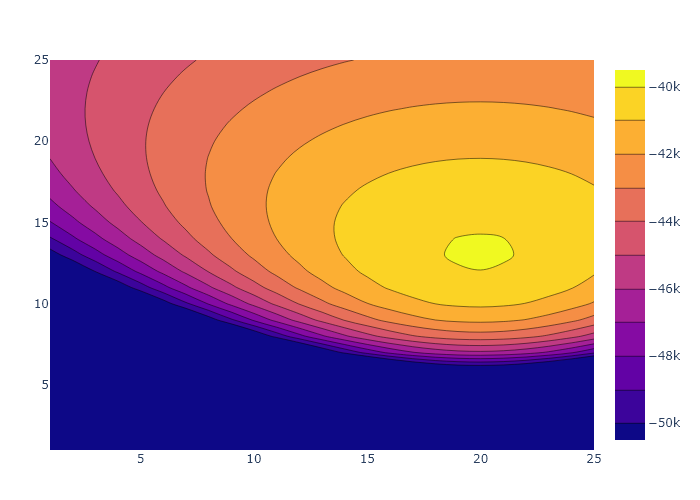

In [7]:
using PlotlyJS

x = y = [i for i in 1:25]
z = [-(size(xnorm,1)/2)*log(2*pi) - 
(size(xnorm,1)/2)*log(y[j]^2) - 
(1/(2*y[j]^2))*sum((xnorm .- x[i]).^2) 
for i in 1:25 for j in 1:25]
z_ = [z[i:i+24] for i in 1:25:625]
data = contour(x = x,
y = y, 
;z=z_,
contours_start=-40000,
contours_end=-50000,
contours_size=-20)
plot(data)


In [17]:

using Gadfly

plot(z=(x,y) -> x*exp(-(x-round(Int, x))^2-y^2),
     x=range(-8,8,150), y=range(-2,2,150), Geom.contour)



plot(z=(x,y) -> (-(size(xnorm,1)/2)*log(2*pi) - 
(size(xnorm,1)/2)*log(y^2) - 
(1/(2*y^2))*sum((xnorm .- x).^2)), Geom.contour())


MethodError: MethodError: no method matching PlotlyBase.Plot(::typeof(Gadfly.Geom.contour); z=var"#61#62"(), x=-8.0:0.10738255033557047:8.0, y=-2.0:0.026845637583892617:2.0)
Closest candidates are:
  PlotlyBase.Plot(::Function, !Matched::Number, !Matched::Number) at C:\Users\alexc\.julia\packages\PlotlyBase\xb3Du\src\convenience_api.jl:88 got unsupported keyword arguments "z", "x", "y"
  PlotlyBase.Plot(::Function, !Matched::Number, !Matched::Number, !Matched::Layout; config, kwargs...) at C:\Users\alexc\.julia\packages\PlotlyBase\xb3Du\src\convenience_api.jl:88
  PlotlyBase.Plot(; config) at C:\Users\alexc\.julia\packages\PlotlyBase\xb3Du\src\PlotlyBase.jl:101 got unsupported keyword arguments "z", "x", "y"
  ...